In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
  
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
for i in train.columns:
    print (i + ": "+str(sum(train[i].isnull()))+" missing values")

PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values


In [ ]:
for i in test.columns:
    print (i + ": "+str(sum(test[i].isnull()))+" missing values")

PassengerId: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 86 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 1 missing values
Cabin: 327 missing values
Embarked: 0 missing values


In [ ]:
train_1=train.groupby(["Pclass","SibSp"])
train_1_median=train_1.median()
train_1_median

PassengerId  Survived   Age  Parch      Fare
Pclass SibSp                                              
1      0            476.0       1.0  37.0    0.0   39.6000
       1            485.0       1.0  38.0    0.0   79.2000
       2            572.0       1.0  44.0    0.0  133.6500
       3             89.0       1.0  23.0    2.0  263.0000
2      0            407.0       0.0  30.0    0.0   13.0000
       1            451.0       1.0  29.0    1.0   26.0000
       2            565.5       0.5  23.5    1.0   39.0000
       3            727.0       1.0  30.0    0.0   21.0000
3      0            472.0       0.0  26.0    0.0    7.8958
       1            372.0       0.0  25.0    0.0   15.5500
       2            334.0       0.0  19.5    0.0   19.2583
       3            302.5       0.0   6.0    1.0   25.4667
       4            264.5       0.0   6.5    1.5   31.2750
       5            387.0       0.0  11.0    2.0   46.9000
       8            325.0       0.0   NaN    2.0   69.5500

In [ ]:
test_1=test.groupby(["Pclass","SibSp"])
test_1_median=test_1.median()
test_1_median

PassengerId   Age  Parch       Fare
Pclass SibSp                                     
1      0           1088.0  39.0    0.0   42.50000
       1           1109.5  46.0    0.0   82.06250
       2            969.0  55.0    0.0   51.47920
       3            945.0  28.0    2.0  263.00000
2      0           1117.5  27.0    0.0   13.00000
       1           1139.0  29.0    0.0   26.00000
       2           1077.5  21.0    0.5   31.50000
3      0           1095.5  24.0    0.0    7.82920
       1           1084.0  20.0    1.0   15.24580
       2           1059.0  19.5    0.0   21.67920
       3           1281.0  29.0    1.0   21.07500
       4           1076.0  11.5    2.0   30.25625
       5           1032.0  10.0    2.0   46.90000
       8           1166.0  14.5    2.0   69.55000

In [ ]:
def fill_train_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()

In [ ]:
train["Age"]=train["Age"].fillna(fill_train_age(train,train_1_median))

In [ ]:
def fill_test_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3,8]["Age"]

In [ ]:
test["Age"]=test["Age"].fillna(fill_test_age(test,test_1_median))

In [ ]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
train["Cabin"]=train["Cabin"].fillna("U")
train["Cabin"]=train["Cabin"].map(lambda x: x[0])

In [ ]:
train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
test.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [ ]:
test["Cabin"]=test["Cabin"].fillna("U")
test["Cabin"]=test["Cabin"].map(lambda x: x[0])

In [ ]:
test.Cabin.unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train["Embarked"]=train["Embarked"].fillna("S")

In [ ]:
test["Fare"]=test["Fare"].fillna(test["Fare"].mean())

In [ ]:
train = train.drop(["Name"],axis=1)
train = train.drop(["Ticket"],axis=1)
test = test.drop(["Name"],axis=1)
test = test.drop(["Ticket"],axis=1)

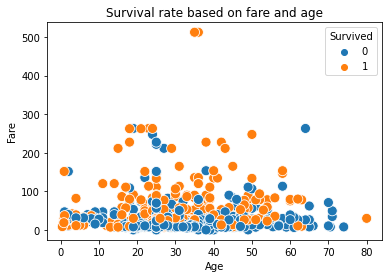

In [ ]:
import seaborn as sns

plt.title("Survival rate based on fare and age")
sns.scatterplot(x=train.Age, y=train.Fare, hue=train.Survived, s=100);

<BarContainer object of 9 artists>

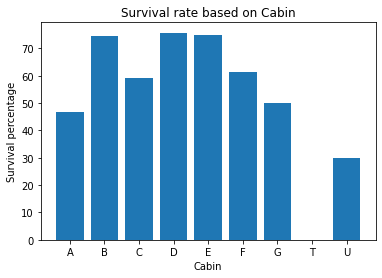

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

Cabin_list = np.unique(train['Cabin'])
y=[]
for cabin in Cabin_list:
  y.append((len(train[train.Cabin==cabin][train.Survived==True])/len(train[train.Cabin==cabin]))*100)
plt.title("Survival rate based on Cabin")
plt.xlabel("Cabin")
plt.ylabel("Survival percentage")
plt.bar(Cabin_list,y)

<BarContainer object of 2 artists>

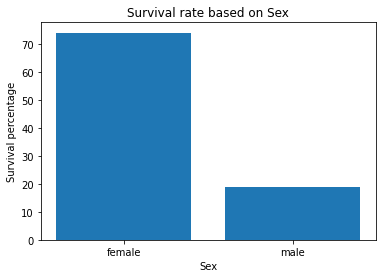

In [ ]:
Sex_list = np.unique(train['Sex'])
z=[]
for sex in Sex_list:
  z.append((len(train[train.Sex==sex][train.Survived==True])/len(train[train.Sex==sex]))*100)
plt.title("Survival rate based on Sex")
plt.xlabel("Sex")
plt.ylabel("Survival percentage")
plt.bar(Sex_list,z)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(train["Sex"])
le.classes_
train["Sex"] = le.transform(train["Sex"])
test["Sex"] = le.transform(test["Sex"])

In [ ]:
le1 = preprocessing.LabelEncoder()

le1.fit(train["Embarked"])
le1.classes_
train["Embarked"] = le1.transform(train["Embarked"])
test["Embarked"] = le1.transform(test["Embarked"])

In [ ]:
le2 = preprocessing.LabelEncoder()

le2.fit(train["Cabin"])
le2.classes_
train["Cabin"] = le2.transform(train["Cabin"])
test["Cabin"] = le2.transform(test["Cabin"])

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,8,2
1,2,1,1,0,38.0,1,0,71.2833,2,0
2,3,1,3,0,26.0,0,0,7.9250,8,2
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,8,2


In [ ]:
x_train = train.drop(["Survived"],axis=1)
y_train = train["Survived"]

In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x_train)

print(x)

[[-1.73010796  0.82737724  0.73769513 ... -0.50244517  0.52206745
   0.58595414]
 [-1.72622007 -1.56610693 -1.35557354 ...  0.78684529 -1.91759389
  -1.9423032 ]
 [-1.72233219  0.82737724 -1.35557354 ... -0.48885426  0.52206745
   0.58595414]
 ...
 [ 1.72233219  0.82737724 -1.35557354 ... -0.17626324  0.52206745
   0.58595414]
 [ 1.72622007 -1.56610693  0.73769513 ... -0.04438104 -1.91759389
  -1.9423032 ]
 [ 1.73010796  0.82737724  0.73769513 ... -0.49237783  0.52206745
  -0.67817453]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

principalDf.head()

,principal_component_1,principal_component_2
0,-1.468033,0.078857
1,3.061996,0.211224
2,-1.017296,0.177702
3,2.269234,0.241511
4,-1.193297,-0.818723


In [ ]:
finalDf = pd.concat([principalDf, y_train], axis = 1)

finalDf.head()

,principal_component_1,principal_component_2,Survived
0,-1.468033,0.078857,0
1,3.061996,0.211224,1
2,-1.017296,0.177702,1
3,2.269234,0.241511,1
4,-1.193297,-0.818723,0


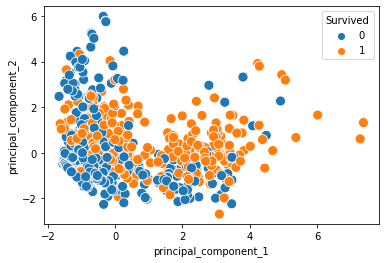

In [ ]:
import seaborn as sns

sns.scatterplot(x=finalDf.principal_component_1, y=finalDf.principal_component_2, hue=finalDf.Survived, s=100);

In [ ]:
from sklearn.svm import SVC

In [ ]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,8,2
1,2,1,0,38.0,1,0,71.2833,2,0
2,3,3,0,26.0,0,0,7.9250,8,2
3,4,1,0,35.0,1,0,53.1000,2,2
4,5,3,1,35.0,0,0,8.0500,8,2


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,8,1
1,893,3,0,47.0,1,0,7.0000,8,2
2,894,2,1,62.0,0,0,9.6875,8,1
3,895,3,1,27.0,0,0,8.6625,8,2
4,896,3,0,22.0,1,1,12.2875,8,2


In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=5)
  
grid.fit(x_train, y_train)
grid.score(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.1, kernel=linear, score=0.804, total=   9.2s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.809, total=   5.3s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.4s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.787, total=   8.5s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.753, total=  16.1s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.787, total=  18.3s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.793, total=   8.8s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.809, total=  24.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.787, total=  21.3s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.753, total=  24.1s
[CV] C=1, kernel=linear ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 13.6min finished


0.7867564534231201

In [ ]:
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [ ]:
from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.01,0.05,0.1,0.5,1],
              'kernel': ['linear']} 
  
grid1 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=5)
  
grid1.fit(x_train, y_train)
grid1.score(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... C=0.01, kernel=linear, score=0.687, total=   0.9s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ............... C=0.01, kernel=linear, score=0.719, total=   0.5s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ............... C=0.01, kernel=linear, score=0.730, total=   0.4s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.742, total=   0.5s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.764, total=   0.2s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.799, total=   1.9s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.809, total=   2.4s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.787, total=   2.6s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.753, total=  13.7s
[CV] C=0.05, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.6min finished


0.7867564534231201

In [ ]:
grid1.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma':[0.01,0.1,1,10,100],
              'kernel': ['rbf']} 
  
grid2 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=5)
  
grid2.fit(x_train, y_train)
grid2.score(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.612, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.612, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.612, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.2s finished


0.6161616161616161

In [ ]:
grid2.best_params_

{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
a1=grid1.best_estimator_.predict(test)
a1df = pd.DataFrame(data=a1)
a1df.to_csv("Linear_predictions.csv",index=False)

a2=grid2.best_estimator_.predict(test)
a2df = pd.DataFrame(data=a2)
a2df.to_csv("RBF_predictions.csv",index=False)

In [ ]:
from google.colab import files

files.download("Linear_predictions.csv")
files.download("RBF_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>